# Real-world Data Wrangling

## 1. Gather data


### **1.1.** Problem Statement

Dogs are a beloved subject on social media, often celebrated for their companionship, cuteness, and humor. Platforms like Twitter provide a unique space for users to share and rate pictures of dogs, resulting in a treasure trove of data that can offer insights into breed popularity and user sentiment.

This analysis explores two key questions based on a dataset of tweets featuring dogs:

1. Which Dog Breed is Most Frequently Predicted?

    Understanding the most common breeds in shared tweets can reveal cultural trends and preferences in dog ownership and photography.

2. What Sources Are Most Commonly Used to Post Tweets?

    This will help us understand which platforms or devices dominate Twitter activity, offering insights into device popularity and trends in app usage.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

In [323]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

#### **WeRateDogs Twitter Archive**

Type: CSV file

Method: Download data manually

In [324]:
# Read CSV file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


#### **Tweet Image Predictions**

Type: TSV File

Method: Programmatically downloading file

In [325]:
# Download file using Requests library via URL provided 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [326]:
# Save the file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
image_prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### **Twitter API**

Type: TXT File

Method: Programmatically downloading file

In [327]:
# Download file using Requests library via URL provided 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

# Save the file
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

# Read downloaded txt file line by line into a pandas DataFrame
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
tweet_json = pd.DataFrame(df_list)
tweet_json.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## 2. Assess data

### 2.1 Twitter Archived Enhanced Data

In [328]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
960,751205363882532864,NaN,NaN,2016-07-08 00:04:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""This photographer took pics of her best frien...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/751205363...,12,10,NaN,NaN,NaN,NaN,NaN
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,a,NaN,NaN,NaN,NaN
1181,719332531645071360,NaN,NaN,2016-04-11 01:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippa. She managed to start the car bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719332531...,11,10,Pippa,NaN,NaN,NaN,NaN
1755,678774928607469569,NaN,NaN,2015-12-21 03:12:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tug. He's not required to wear the con...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678774928...,11,10,Tug,NaN,NaN,NaN,NaN
1072,739979191639244800,NaN,NaN,2016-06-07 00:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nollie. She's waving at you. If you do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739979191...,12,10,Nollie,NaN,NaN,NaN,NaN
793,773547596996571136,NaN,NaN,2016-09-07 15:44:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chelsea. She forgot how to dog. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773547596...,11,10,Chelsea,NaN,NaN,pupper,NaN
888,759846353224826880,NaN,NaN,2016-07-31 20:21:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kirby. He's a Beneblip Cumberpat. Pret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759846353...,11,10,Kirby,NaN,NaN,NaN,NaN
2013,672231046314901505,NaN,NaN,2015-12-03 01:49:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic underwater dog here. Very shy. Wont ret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672231046...,5,10,NaN,NaN,NaN,NaN,NaN
518,810657578271330305,NaN,NaN,2016-12-19 01:26:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pavlov. His floatation device has fail...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810657578...,11,10,Pavlov,NaN,NaN,NaN,NaN
493,813202720496779264,NaN,NaN,2016-12-26 02:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo who has concluded that Christma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813202720...,11,10,NaN,doggo,NaN,NaN,NaN


In [329]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [330]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### 2.2 Image Predictions data

In [331]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
537,676948236477857792,https://pbs.twimg.com/media/CWUA1GFW4AAowiq.jpg,1,guenon,0.611603,False,macaque,0.135176,False,squirrel_monkey,0.083247,False
1962,866686824827068416,https://pbs.twimg.com/media/DAcXEWuXkAIBDGJ.jpg,1,flat-coated_retriever,0.514730,True,groenendael,0.306407,True,curly-coated_retriever,0.061314,True
1039,712085617388212225,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,2,Shih-Tzu,0.625129,True,Tibetan_terrier,0.126897,True,Lhasa,0.119663,True
30,666418789513326592,https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg,1,toy_terrier,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True
985,707610948723478529,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,1,golden_retriever,0.383223,True,cocker_spaniel,0.165930,True,Chesapeake_Bay_retriever,0.118199,True
1796,831322785565769729,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,1,Old_English_sheepdog,0.999715,True,Tibetan_terrier,0.000046,True,guinea_pig,0.000041,False
294,671355857343524864,https://pbs.twimg.com/media/CVEilyCUwAETbJ-.jpg,1,miniature_poodle,0.313811,True,toy_poodle,0.165585,True,Irish_terrier,0.056094,True
1896,850145622816686080,https://pbs.twimg.com/media/C8xS655XkAAv9vo.jpg,2,tennis_ball,0.714798,False,kelpie,0.105390,True,malinois,0.058553,True
1646,808501579447930884,https://pbs.twimg.com/media/Czhf4XtVQAAIqpd.jpg,2,Airedale,0.454239,True,cocker_spaniel,0.219323,True,Irish_terrier,0.093193,True
1247,747600769478692864,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True


In [332]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [333]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### 2.3 Twitter api data

In [334]:
tweet_json.sample(10)

,tweet_id,retweet_count,favorite_count
1543,689289219123089408,1056,2476
1382,700796979434098688,1085,2669
2114,670427002554466305,179,551
755,778650543019483137,1729,6430
80,877201837425926144,5880,27755
1331,705442520700944385,1859,4877
1343,704491224099647488,97,840
2088,670786190031921152,218,640
122,868880397819494401,12518,55098
1172,720059472081784833,1268,4229


In [335]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [336]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality Issue 1: Missing Data

Issue and justification: 
- In twitter_archive, Columns like `name` have values like "a", "None", or similar, which are invalid. Missing expanded URLs for some tweets.

### Quality Issue 2: Inconsistent Data

Issue and justification: 
- In twitter_archive, timestamp should be datetime instead of object.

### Tidiness Issue 1:

Issue and justification: Dog Stages in One Column

- In twitter_archive, Dog stages (doggo, floofer, pupper, puppo) are spread across multiple columns instead of being combined into one column `stage`.

### Tidiness Issue 2: 

Issue and justification: 

- In image_prediction, predicted labels (p1, p2, p3) should be reorganized into a single column for analysis.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [337]:
# Make copies of the datasets to ensure the raw dataframes 
# are not impacted

twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### **Quality Issue 1: MISSING VALUE**

In [338]:
# Replace Invalid Dog Names (e.g, "a", "None") with "NaN"

twitter_archive_clean['name'] = twitter_archive['name'].replace(['None', 'a'], np.nan)

In [339]:
# Validate the cleaning was successful

twitter_archive_clean['name'].value_counts(dropna=False).head()

name
NaN        800
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Name: count, dtype: int64

### **Quality Issue 2: INCONSISTENT DATA**

In [340]:
#Apply the cleaning strategy

twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive.timestamp)

In [341]:
#Validate the cleaning was successful

twitter_archive_clean.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

### **Tidiness Issue 1: Combine Dog Stages into a Single Column** 

In [342]:
#Apply the cleaning strategy
# Combine dog stages

stages = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean['stage'] = twitter_archive[stages].apply(lambda x: ','.join(x.dropna()), axis=1)
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('', pd.NA)
twitter_archive_clean.drop(columns=stages, inplace=True)

In [343]:
#FILL IN - Validate the cleaning was successful
# Check unique values in the new `stage` column

twitter_archive_clean['stage'].value_counts(dropna=False)

stage
<NA>             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: count, dtype: int64

### **Tidiness Issue 2: Reshape Prediction Columns**

In [344]:
#Apply the cleaning strategy

predictions = image_prediction.melt(
    id_vars=['tweet_id'],
    value_vars=['p1', 'p2', 'p3'],
    var_name='prediction_level',
    value_name='breed'
)

In [345]:
#Validate the cleaning was successful

predictions.head()

,tweet_id,prediction_level,breed
0,666020888022790149,p1,Welsh_springer_spaniel
1,666029285002620928,p1,redbone
2,666033412701032449,p1,German_shepherd
3,666044226329800704,p1,Rhodesian_ridgeback
4,666049248165822465,p1,miniature_pinscher


### **Remove unnecessary variables and combine datasets**

Combine the datasets into one using the tweet_id as the common key.

In [346]:
#FILL IN - Remove unnecessary variables and combine datasets
# Merge datasets

master_clean_df = pd.merge(twitter_archive_clean, tweet_json_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
master_clean_df = pd.merge(master_clean_df, image_prediction, left_on='tweet_id', right_on='tweet_id', how='inner')
master_clean_df = pd.merge(master_clean_df, predictions, on='tweet_id', how='inner')


# List of columns to drop
columns_to_drop = [
    'in_reply_to_status_id', 'in_reply_to_user_id',
    'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
    'expanded_urls', 'jpg_url', 'img_num',
    'p1', 'p1_conf', 'p1_dog',
    'p2', 'p2_conf', 'p2_dog',
    'p3', 'p3_conf', 'p3_dog'
]

# Drop the columns
master_clean_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [347]:
#Validate the cleaning was successful
master_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'retweet_count',
       'favorite_count', 'prediction_level', 'breed'],
      dtype='object')

## 4. Update your data store

Save the cleaned and merged dataset for further analysis.

In [348]:
#saving data

master_clean_df.to_csv('master_clean.csv', index=False)

## 5. Answer the research question

### **5.1:** Which Dog Breed is Most Frequently Predicted?
The dataset contains predictions for the breed of dogs in tweet images. Using these predictions, we identify the top 10 most frequently predicted breeds to understand the popularity distribution.

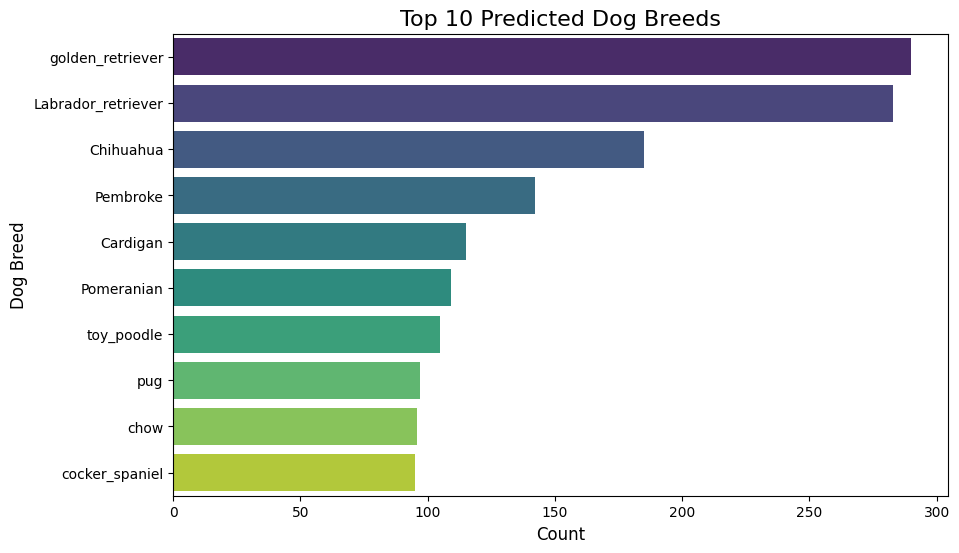

In [349]:
# Top 10 breeds
top_breeds = master_clean_df['breed'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_breeds.values, 
    y=top_breeds.index, 
    hue=top_breeds.index,  # Use the y-axis variable as `hue`
    palette="viridis", 
    legend=False           # Suppress the legend
)
plt.title("Top 10 Predicted Dog Breeds", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Dog Breed", fontsize=12)
plt.show()

### **5.2:** What Sources Are Most Commonly Used to Post Tweets?
we need to analyze the source column in the `master_clean_df` dataset, which indicates the platform or app used to post the tweets.

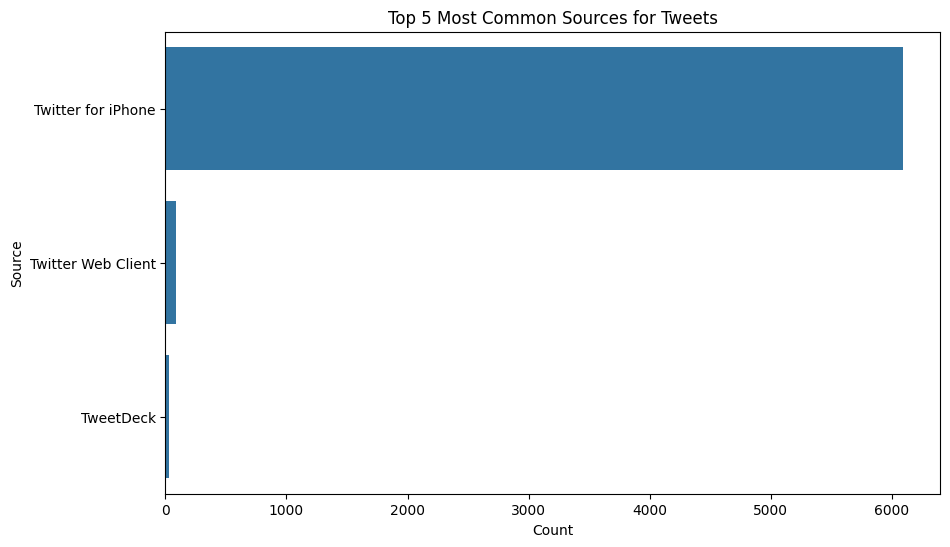

In [350]:
# Extracting source names from HTML-like strings
master_clean_df['clean_source'] = master_clean_df['source'].apply(lambda x: re.findall(r'>(.*?)<', x)[0] if pd.notnull(x) else 'Unknown')

# Count the occurrences of each source
source_counts = master_clean_df['clean_source'].value_counts()

# Take the top 5 most common sources
top_sources = source_counts.head(5)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sources.values, y=top_sources.index)
plt.xlabel('Count')
plt.ylabel('Source')
plt.title('Top 5 Most Common Sources for Tweets')
plt.show()

### **5.2:** Reflection
If I had more time to complete the project, I would further explore data quality issues

In `twitter-archive-enhanced.csv`
1. Inaccurate Ratings:

    Some rating_numerator and rating_denominator values are incorrect or inconsistently extracted from tweet text.

2. Redundant Columns:

Some columns like retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp are present but redundant because only original tweets are required.

In `image-predictions.tsv`
1. Inconsistent Naming Conventions:

    The p1, p2, and p3 columns (predicted breeds) have inconsistent capitalization (e.g., "golden_retriever" vs. "Labrador_retriever").

2. Low Confidence Predictions:

    Some predictions (e.g., p1_conf) have extremely low confidence scores, which may not be useful for analysis.

3. Ambiguous Information:

    The model predicts multiple breeds, but there's no clarity on how to handle cases where all predictions are below a certain confidence threshold.